Load Libraries

In [6]:
from keras.models import Sequential
from keras.layers import Conv2D,Flatten,MaxPool2D,Dense
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import pickle
import numpy as np
import os
from PIL import Image
from sklearn.model_selection import train_test_split

Load Data


In [7]:
def load_images_from_folder(folder):
    images = []
    labels = []
    class_names = [d for d in os.listdir(folder) if os.path.isdir(os.path.join(folder, d))]
    class_dict = {name: i for i, name in enumerate(sorted(class_names))}
    for class_name in class_names:
        class_folder = os.path.join(folder, class_name)
        for filename in os.listdir(class_folder):
            if filename.endswith(('.jpg', '.png', '.bmp')):
                img_path = os.path.join(class_folder, filename)
                img = Image.open(img_path).resize((32, 32))
                img_array = np.array(img)
                if len(img_array.shape) == 3 and img_array.shape[2] == 3:
                    images.append(img_array)
                    labels.append(class_dict[class_name])
    images = np.array(images)
    labels = np.array(labels)
    unique_labels = np.unique(labels)
    label_map = {old: new for new, old in enumerate(sorted(unique_labels))}
    labels = np.array([label_map[l] for l in labels])
    return images, labels

x_train, y_train = load_images_from_folder('C:/Users/aryan/Downloads/archive/data')

# Split into train and test
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

# Normalize
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

num_classes = len(np.unique(y_train))

Preprocessing

In [8]:
print(y_train[0])
y_train = to_categorical(y_train, num_classes=num_classes)
print(y_train[0])
y_test = to_categorical(y_test, num_classes=num_classes)

5
[0. 0. 0. 0. 0. 1.]


In [9]:
print(y_train.shape)
print(x_train.shape)

(1274, 6)
(1274, 32, 32, 3)


Build Architecture


In [10]:
model = Sequential()
model.add(Conv2D(6,(3,3),activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Flatten(input_shape=(32,32,3)))
model.add(Dense(128,activation = 'relu'))
model.add(Dense(num_classes,activation='softmax'))

c:\Users\aryan\Desktop\DL\venv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [11]:
model.compile(optimizer = 'sgd', loss = 'categorical_crossentropy',metrics = ['accuracy'])

In [12]:
model.fit(x_train,y_train,epochs = 10, batch_size = 64)

Epoch 1/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.2401 - loss: 1.7570 
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.2401 - loss: 1.7570
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2556 - loss: 1.7442
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2556 - loss: 1.7442
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2609 - loss: 1.7208
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2609 - loss: 1.7208
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2650 - loss: 1.7073
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2650 - loss: 1.7073
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2954 - loss: 1.6976
Epoch 6/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2954 - loss: 1.6976
Epoch 6/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2949 - loss: 1.6809
Epoch 7/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2949 - loss

Experiment-2
 

Analysis: In the prev experiment, it is observed that accuracy is improved continuously for every epoch.

So, continue the training process by increasing the epochs from 10 to 30


Hyperparameters: 
    epochs: 30
    

In [13]:
model.fit(x_train,y_train,epochs = 30, batch_size = 64)

Epoch 1/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3949 - loss: 1.6050
Epoch 2/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3949 - loss: 1.6050
Epoch 2/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3735 - loss: 1.5783
Epoch 3/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3735 - loss: 1.5783
Epoch 3/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3868 - loss: 1.5760
Epoch 4/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3868 - loss: 1.5760
Epoch 4/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4003 - loss: 1.5298
Epoch 5/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4003 - loss: 1.5298
Epoch 5/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4207 - loss: 1.5138
Epoch 6/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4207 - loss: 1.5138
Epoch 6/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4101 - loss: 1.5102
Epoch 7/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4101 - loss:

In [14]:
model.fit(x_train,y_train,epochs = 50, batch_size = 64)

Epoch 1/50
 1/20 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.5000 - loss: 1.3563

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6021 - loss: 1.1471
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6021 - loss: 1.1471
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6107 - loss: 1.0998
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6107 - loss: 1.0998
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5590 - loss: 1.1984
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5590 - loss: 1.1984
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6367 - loss: 1.0742
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6367 - loss: 1.0742
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6172 - loss: 1.0958
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6172 - loss: 1.0958
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6363 - loss: 1.0955
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6363 - loss: 1.0955
Epo

In [15]:
model = Sequential()
model.add(Conv2D(6,(3,3),activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Flatten(input_shape=(32,32,3)))
model.add(Dense(128,activation = 'relu'))
model.add(Dense(64,activation = 'relu'))
model.add(Dense(num_classes,activation='softmax'))
model.compile(optimizer = 'sgd', loss = 'categorical_crossentropy',metrics = ['accuracy'])
model.fit(x_train,y_train,epochs = 10, batch_size = 64)

Epoch 1/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2241 - loss: 1.7808
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2241 - loss: 1.7808
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2753 - loss: 1.7225
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2753 - loss: 1.7225
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2654 - loss: 1.7137
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2654 - loss: 1.7137
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2945 - loss: 1.6958
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2945 - loss: 1.6958
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2937 - loss: 1.6850
Epoch 6/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2937 - loss: 1.6850
Epoch 6/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3042 - loss: 1.6848
Epoch 7/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3042 - loss:

In [16]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy',metrics = ['accuracy'])
model.fit(x_train,y_train,epochs = 50, batch_size = 64)

Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.3222 - loss: 1.6838 
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.3222 - loss: 1.6838
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4113 - loss: 1.5243
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4113 - loss: 1.5243
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4604 - loss: 1.4236
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4604 - loss: 1.4236
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5299 - loss: 1.3066
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5299 - loss: 1.3066
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5504 - loss: 1.2297
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5504 - loss: 1.2297
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5599 - loss: 1.2094
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5599 - loss

Experiment - 3


In [17]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy',metrics = ['accuracy'])
result = model.fit(x_train,y_train,epochs = 10, batch_size = 64,validation_data = (x_test,y_test))



Epoch 1/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9162 - loss: 0.2497 - val_accuracy: 0.6614 - val_loss: 1.3886
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9162 - loss: 0.2497 - val_accuracy: 0.6614 - val_loss: 1.3886
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9908 - loss: 0.0638 - val_accuracy: 0.6708 - val_loss: 1.3676
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9908 - loss: 0.0638 - val_accuracy: 0.6708 - val_loss: 1.3676
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9980 - loss: 0.0432 - val_accuracy: 0.6395 - val_loss: 1.3601
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9980 - loss: 0.0432 - val_accuracy: 0.6395 - val_loss: 1.3601
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9993 - loss: 0.0308 - val_accuracy: 0.6646 - val_loss: 1.4026
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9993 - loss: 0.0308 - val_accuracy: 0.6646 - val_los

In [18]:
print(result.history.items())



dict_items([('accuracy', [0.9254317283630371, 0.9929356575012207, 0.9984301328659058, 0.9992150664329529, 0.9992150664329529, 0.9992150664329529, 0.9984301328659058, 0.9992150664329529, 0.9992150664329529, 0.9984301328659058]), ('loss', [0.20835790038108826, 0.06137804314494133, 0.03865395113825798, 0.026469197124242783, 0.022262180224061012, 0.0197053924202919, 0.01825246773660183, 0.016947604715824127, 0.015653887763619423, 0.01871517300605774]), ('val_accuracy', [0.66144198179245, 0.6708464026451111, 0.6394984126091003, 0.6645768284797668, 0.6332288384437561, 0.6457680463790894, 0.6394984126091003, 0.6583071947097778, 0.6645768284797668, 0.6708464026451111]), ('val_loss', [1.3886232376098633, 1.3675768375396729, 1.3600703477859497, 1.4026458263397217, 1.4156136512756348, 1.4848006963729858, 1.4798201322555542, 1.5299419164657593, 1.5912095308303833, 1.6097220182418823])])


In [19]:
print(result.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


Visualization

Text(0.5, 1.0, '')

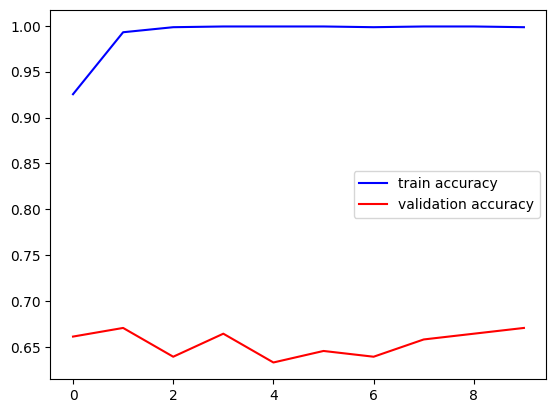

In [20]:
plt.plot(result.history['accuracy'],label = 'train accuracy',color = 'blue')
plt.plot(result.history['val_accuracy'],label = 'validation accuracy',color = 'red')
plt.legend()
plt.title('')

In [21]:
image data folder

SyntaxError: invalid syntax (1249550833.py, line 1)